# Introduction

Pour les économistes et les analystes financiers, les cours boursiers sont avant tout
influencés par les informations issues du monde réel, à savoir les résultats des
entreprises, la croissance économique, les conditions météorologiques, les conflits
géopolitiques, etc. Toutes ces raisons sont louables et doivent être prises en compte par
le trader ou l’investisseur. Néanmoins, pour l’analyste technique, l’information la plus
importante est fournie par les cours boursiers. Car, au final, peut-on réellement
considérer une nouvelle comme positive si le marché ne progresse pas ? La réponse est
bien évidemment non. Ce qui fait bouger les marchés, c’est avant tout la confrontation
entre les « offreurs » et les « demandeurs ». Cette confrontation perpétuelle est à
l’origine de la formation des cours boursiers. Lorsque les acheteurs ont la main, les
cours boursiers ont tendance à progresser. Inversement, lorsque le pessimisme règne, ce
sont les vendeurs qui maîtrisent la situation et les cours boursiers déclinent.
</br> donc pour les choix de ces actifs nous avons implémenter et appliquer les methodes de l'analyses techniques, plus le ressenti du marché exterrieur.
## Analyse technique :
Dans cette partie de l'analyse technique nous avis pris concience des indicateurs qui sont affiché dans la 2eme section de ce projet. Dans cette partie nous avons pratiqué notre analyse technique à l'aide des indicateurs dans yahoo finance.

### Action 1 : Pfizer Inc. (PFE)
#### Analyse technique:
![image-2.png](attachment:image-2.png)
#### commentaires:
![image-3.png](attachment:image-3.png)
</br>

On remarque selon l'analyse technique que l'action de PFE est en tendence haussière clairement ce qui est un très bon indicateur pour pouvoir investir pour les prochain jours. Ainsi, le sentiement du marché nous indique qu'il faut renforcer son portfeuille avec cette action et selon la psychologie, l'action va s'evoluer en suivant la crise sanitère grace au besoin du vaccin fabriqué par le laboratoire fizer.
Selon l'analyse technique, on remarque un taux de volatilité historique bas et un ecart type faible en ces derniers temps.
### Action 2 : Xcel Energy Inc. (XEL)

#### Analyse technique:
![image-4.png](attachment:image-4.png)
#### commentaires:
![image-6.png](attachment:image-6.png)
On remarque selon l'analyse technique que l'action XEL est en tendence haussière est c'est bien indiqué a l'aide de l'indicateur moyenne mobile. Ainsi, le sentiement du marché nous indique qu'il faut renforcer son portfeuille avec cette action. et selon la psychologie.Cet actif reste risqué relativement mais selon les indicateurs d'ecart type et volatilité ce risque est acceptable.
### Action 3 : QUALCOMM Incorporated (QCOM)

#### Analyse technique:
Sur lalongue periode:
![image-7.png](attachment:image-7.png)
sur une période de 10 jours :
![image-8.png](attachment:image-8.png)
#### commentaires:
Sentiment du marché :
![image-9.png](attachment:image-9.png)
</br>

On remarque selon l'analyse technique que l'action QCOM est en tendence haussière moyenne est c'est bien indiqué a l'aide de l'indicateur envloppe moyenne mobile et la moyenne mobile. Ainsi, le sentiement du marché nous indique qu'il faut Acheter. et selon la psychologie.Cet actif est moin risque sur cette periode avec une volatilité egale a 2 pour l'instant.
### Action 4 : NVIDIA Corporation (NVDA)

#### Analyse technique:
sur une période de 10 jours :
![image-10.png](attachment:image-10.png)


#### commentaires:
Sentiment du marché :
![image-11.png](attachment:image-11.png)

On remarque selon l'analyse technique que l'action NVIDIA Corporation (NVDA) est en tendence haussière clair. Ainsi, le sentiement du marché nous indique qu'il faut Acheter. et selon la psychologie.Cet actif est moin risque sur cette periode avec une volatilité égale à 3.
### Action 5 : Sumo Logic, Inc. (SUMO)

#### Analyse technique:
sur une période de 10 jours :
![image-12.png](attachment:image-12.png)

#### commentaires:
Sentiment du marché :
![image-13.png](attachment:image-13.png)

On remarque selon l'analyse technique que l'action Sumo Logic, Inc. (SUMO) est en baisse. aprés ça cotation élevé. on prévois un retournement proche du marché. les lignes horizentales définis sur les point pivots, on a une haute fréquance en dessus de la valeur actuelle de l'actif en H4, ce qui implique avec une haute probabilité un retournement en hausse dee l'action.
Le sentiment du marché partage la meme idée et nous indique qu'il faut acheter et en fort demande détenir l'action en attendant son évolution.
### Action 6 : Vistra Corp. (VST)

#### Analyse technique:
sur une période de 10 jours :
![image-14.png](attachment:image-14.png)

#### commentaires:
Sentiment du marché :
![image-15.png](attachment:image-15.png)

On remarque selon l'analyse technique que l'action Vistra Corp. (VST) est assez risqué. Mais, le sentiement du marché nous indique qu'il faut Acheter. et selon la psychologie.Cet actif est moin risque sur cette periode avec une volatilité égale à 3 pour l'instant.
Suivant la théorie de Dow on mise sur Accumulation une suivis d'un retournement du marché qui arrivera dans pas longtemps selon les indicateurs :
![image-16.png](attachment:image-16.png)
![image-17.png](attachment:image-17.png)
Selons les lignes horizentales sur les points de contacts, un retournement de situation et plus probable.
tous ces indicateurs nous positionne en acheteur et que l'actif va s'évolue.
### Action 7 : Microsoft Corporation (MSFT)

#### Analyse technique:
sur une période de 10 jours :
![image-18.png](attachment:image-18.png)

#### commentaires:
Sentiment du marché :
![image-19.png](attachment:image-19.png)
On remarque selon l'analyse technique que l'action Microsoft Corporation (MSFT) est en tendance haussière. Mais, le sentiement du marché nous indique qu'il faut acheter principalement.
tous ces indicateurs nous positionne en acheteur et que l'actif va s'évolue.

### Action 8 : Tufin Software Technologies Ltd. (TUFN)

#### Analyse technique:
sur une période de 10 jours :
![image-20.png](attachment:image-20.png)
![image-21.png](attachment:image-21.png)


#### commentaires:
Sentiment du marché :
![image-22.png](attachment:image-22.png)
On remarque selon l'analyse technique que l'action Tufin Software Technologies Ltd. (TUFN) on a pas vraiment d'informations sur l'actifs en question mais, selon les points de contacts de la suite de fibonnacci et nottament, quand on dépasse les 50% l'actif se tends vers une hausse pour reprendre le prix initial et c'est aussi le sentiment du marché.
### Action 9 : Advanced Micro Devices, Inc. (AMD)

#### Analyse technique:
sur une période de 10 jours :
![image-23.png](attachment:image-23.png)


#### commentaires:
Sentiment du marché :
![image-24.png](attachment:image-24.png)
On remarque selon l'analyse technique que l'action Tufin Software Technologies Ltd. (TUFN) on a pas vraiment d'informations sur l'actifs en question mais, selon les points de contacts de la suite de fibonnacci et nottament, quand on dépasse les 50% l'actif se tends vers une hausse pour reprendre le prix initial et c'est aussi le sentiment du marché.

### Action 10 : Tesla, Inc. (TSLA)

#### Analyse technique:
sur une période de 6mois:
![image-25.png](attachment:image-25.png)
![image-26.png](attachment:image-26.png)

#### commentaires:
Sentiment du marché :
![image-27.png](attachment:image-27.png)
Pour cet actif on est un peu métigé, le retournement dow dans 2e figure nous indique un retournement proche du marché qui tends vers une baisse, et c'est aussi le sentiment du marché. Mais, selon les informations et l'historique de l'entreprise et la volatilité de l'actif qui n'est pas vraiment risqué historiquement,  on préfere détenir.

# Vision sur notre portfeuille


In [1]:
# Data loading :
import time
from alpha_vantage.techindicators import TechIndicators
from alpha_vantage.sectorperformance import SectorPerformances
from alpha_vantage.cryptocurrencies import CryptoCurrencies
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from scipy.optimize import minimize
from alpha_vantage.timeseries import TimeSeries


matplotlib.rcParams['figure.figsize'] = (20.0, 10.0)
ApiKeys=['VJMFOOF2142SSW1C','WYWB2IMM1ZI4532Q']
ts = TimeSeries(ApiKeys[1], output_format='pandas')


### Vision sur les performences des secteurs :

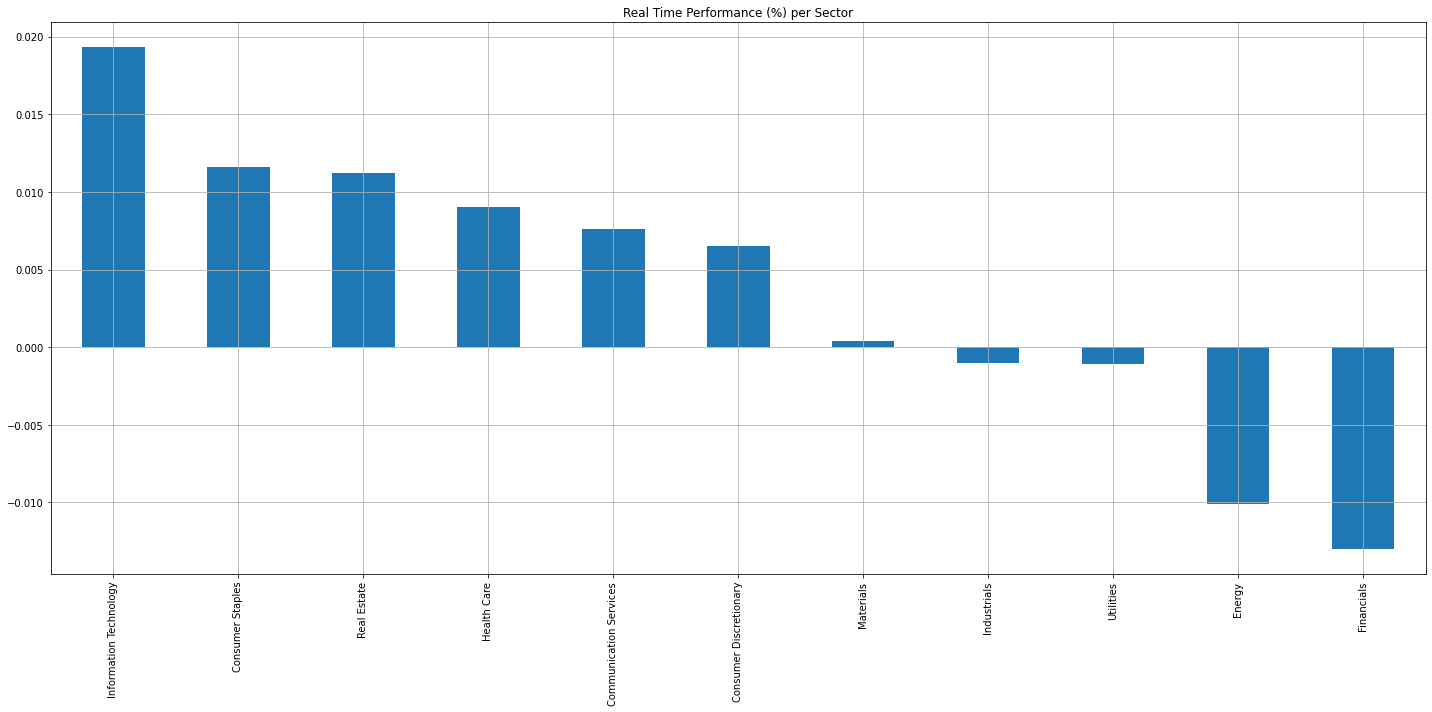

In [2]:
sp = SectorPerformances(key=ApiKeys[0], output_format='pandas')
data, meta_data = sp.get_sector()
data.describe()

data['Rank A: Real-Time Performance'].plot(kind='bar')
plt.title('Real Time Performance (%) per Sector')
plt.tight_layout()
plt.grid()
plt.show()

In [ ]:
stocks = ['XEL','AMD','PFE','NVDA','QCOM','SUMO','VST','TUFN','MSFT','TSLA']
returns = pd.DataFrame({})
i = 1
for s in stocks: #portfolio_composition:
    if i==6:
        time.sleep(120)
    data, meta_data = ts.get_daily_adjusted(symbol=s)
    data['return_%s' % (s)] = data['4. close'].pct_change(1)
    returns = returns.join(data[['return_%s' % (s)]],how="outer").dropna()
    i=i+1

returns

## les indicateurs de pérformence pour chaque actif :
![image.png](attachment:image.png)
![image-2.png](attachment:image-2.png)
![image-3.png](attachment:image-3.png)
![image.png](attachment:image.png)
![image-2.png](attachment:image-2.png)
![image-3.png](attachment:image-3.png)
![image-4.png](attachment:image-4.png)
![image-5.png](attachment:image-5.png)
![image-6.png](attachment:image-6.png)
![image-7.png](attachment:image-7.png)

In [ ]:
returns.plot()

In [ ]:
daily_returns_portfolio_mean = returns.mean()
daily_returns_portfolio_mean

### Matrice de covariance :
à utiliser dans le modèl markowitz pour trouer la meilleure rpéartition du portfeuille !

In [ ]:

def constraint1(X):
    sum = 1
    for i in range(1,X.size):
        sum = sum - X[i]
    return sum

def constraint2(X):
    sum = 0
    for i in range(1,X.size):
        sum += X[i]*daily_returns_portfolio_mean[i]
    return sum - RendementVise

def minimizationfunction(x):
    somme=0
    for i in range(len(x)):
        for j in range(len(x)):
            somme += MatCov.values[i,j]*x[j]*x[i]
    return somme

def minimizing(taille):
    cons = ({'type': 'eq', 'fun': constraint1 },
            {'type': 'ineq', 'fun': constraint2 })
    x=np.ones(taille)
    bounds = []
    for i in range(taille):
        bounds.append((0.0001,None))

    result = minimize(minimizationfunction, x,   options={'verbose': 1}, bounds=bounds, method='trust-constr',constraints=cons )
    solutions = result.x
    print(solutions)
    return solutions


## Application du modèl markowitz sur notre portfeuille
Dans cette partie nous avons appliqué le modèl markowitz sur notre portfeuille, Nous avons calculé la matrice des covariances apartir de l'historique des rendements. Ensuite, nous avons calculé la moyenne des rendemnts des actifs. Pour finalement, passer ces parametres a notres modél markowitz que nous avons implementé pour avoir la meilleure répartition des fraction d'actif avec une variance minimal

In [ ]:
def markowitz(RendementVise,taille):
    RendementVise=RendementVise
    return minimizing(taille)
MatCov = returns.cov()
RendementVise=0.0009
initial_weight = markowitz(RendementVise,len(stocks))

print("\n\n\nles fractions d'actifs sont:" , initial_weight)

## Rendement total du portfeuille :


In [ ]:
allocated_daily_returns = (initial_weight * daily_returns_portfolio_mean)
portfolio_return = np.sum(allocated_daily_returns)
portfolio_return

In [ ]:
Cumulative_returns_daily = (1+returns).cumprod() -1
Cumulative_returns_daily


In [ ]:
Cumulative_returns_daily.plot()

### Daily portfolio portfolio return


In [ ]:
portfolio_daily_returns = returns.dot(initial_weight)
portfolio_daily_returns


In [ ]:
Cumulative_portfolio_returns_daily = (1+portfolio_daily_returns).cumprod()-1
Cumulative_portfolio_returns_daily
Cumulative_portfolio_returns_daily.plot()

## Le portfeuille benchmark :


In [ ]:
data, meta_data = ts.get_daily_adjusted(symbol='SPY')
spy_return = data['4. close'].pct_change(1)

import numpy as np
x = range(len(portfolio_daily_returns))
pr = portfolio_daily_returns
#plt.rcParams['figure.figsize'] = [10, 10]

plt.plot(x,pr,label="Portfolio")
plt.plot(range(len(spy_return)),spy_return,label=" SP500")

plt.xlabel("Day")
plt.ylabel("Portfolio return")

plt.grid()
plt.legend()

plt.show()

In [ ]:
spy_cum = (1+spy_return).cumprod()-1
prc =  (1+portfolio_daily_returns).cumprod()-1
x = range(len(prc))
#x = range(spy_cum)
#plt.rcParams['figure.figsize'] = [10, 10]

plt.plot(x,prc,label="Portfolio")
plt.plot(range(len(spy_cum)),spy_cum,label=" SP500")

plt.xlabel("Day")
plt.ylabel("Portfolio return")

plt.grid()
plt.legend()

plt.show()

### Sharpe Ratio

In [ ]:
Sharpe_Ratio = portfolio_return / portfolio_daily_returns.std()
Sharpe_Ratio

# Notre portfeuille finale :


<table>
  <tbody>
  <tr>
  <td >Actifs</td>
  <td >XEL</td>
  <td width="83">AMD</td>
  <td width="83">PFE</td>
  <td width="83">NVDA</td>
  <td width="83">QCOM</td>
  <td width="83">SUMO</td>
  <td width="83">VST</td>
  <td width="83">TUFN</td>
  <td width="83">MSFT</td>
  <td width="83">TSLA</td>
  </tr>
  <tr>
  <td>La fraction du portfeuille</td>
  <td>0.00222</td>
  <td>0.00248</td>
  <td>0.47979</td>
  <td>0.19947</td>
  <td>0.00098</td>
  <td>0.07991</td>
  <td>0.23616</td>
  <td>0.00024</td>
  <td>0.00069</td>
  <td>0.00024</td>
  </tr>
  <tr>
  <td>total ratio de sharpe</td>
  <td>60%</td>

  </tr>
  </tbody>
  </table>